In [29]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

In [30]:
raw_data = pd.read_csv('/content/sample_data/train.csv')

In [31]:
CATEGORICAL_COLUMNS = ['gender','ethnicity','jaundice','austim','contry_of_res','used_app_before','age_desc','relation']

In [32]:
new_raw_data = pd.get_dummies(raw_data, columns = CATEGORICAL_COLUMNS)

In [33]:
NEW_COLUMNS = ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'result', 'Class/ASD', 'gender_f', 'gender_m', 'ethnicity_?',
       'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic',
       'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others',
       'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish',
       'ethnicity_White-European', 'ethnicity_others', 'jaundice_no',
       'jaundice_yes', 'austim_no', 'austim_yes', 'contry_of_res_Afghanistan',
       'contry_of_res_AmericanSamoa', 'contry_of_res_Angola',
       'contry_of_res_Argentina', 'contry_of_res_Armenia',
       'contry_of_res_Aruba', 'contry_of_res_Australia',
       'contry_of_res_Austria', 'contry_of_res_Azerbaijan',
       'contry_of_res_Bahamas', 'contry_of_res_Bangladesh',
       'contry_of_res_Belgium', 'contry_of_res_Bolivia',
       'contry_of_res_Brazil', 'contry_of_res_Burundi', 'contry_of_res_Canada',
       'contry_of_res_China', 'contry_of_res_Cyprus',
       'contry_of_res_Czech Republic', 'contry_of_res_Egypt',
       'contry_of_res_Ethiopia', 'contry_of_res_France',
       'contry_of_res_Germany', 'contry_of_res_Hong Kong',
       'contry_of_res_Iceland', 'contry_of_res_India', 'contry_of_res_Iran',
       'contry_of_res_Iraq', 'contry_of_res_Ireland', 'contry_of_res_Italy',
       'contry_of_res_Japan', 'contry_of_res_Jordan',
       'contry_of_res_Kazakhstan', 'contry_of_res_Malaysia',
       'contry_of_res_Mexico', 'contry_of_res_Netherlands',
       'contry_of_res_New Zealand', 'contry_of_res_Nicaragua',
       'contry_of_res_Niger', 'contry_of_res_Oman', 'contry_of_res_Pakistan',
       'contry_of_res_Romania', 'contry_of_res_Russia',
       'contry_of_res_Saudi Arabia', 'contry_of_res_Serbia',
       'contry_of_res_Sierra Leone', 'contry_of_res_South Africa',
       'contry_of_res_Spain', 'contry_of_res_Sri Lanka',
       'contry_of_res_Sweden', 'contry_of_res_Tonga', 'contry_of_res_Ukraine',
       'contry_of_res_United Arab Emirates', 'contry_of_res_United Kingdom',
       'contry_of_res_United States', 'contry_of_res_Viet Nam',
       'used_app_before_no', 'used_app_before_yes', 'age_desc_18 and more',
       'relation_?', 'relation_Health care professional', 'relation_Others',
       'relation_Parent', 'relation_Relative', 'relation_Self']

In [34]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [35]:
features = [NEW_COLUMNS]
for feature in features:
    new_raw_data[feature] = scaler.fit_transform(new_raw_data[feature])

In [36]:
X = new_raw_data.drop('Class/ASD', axis=1).values
y = new_raw_data['Class/ASD'].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

In [38]:
svm = svm.SVC(kernel='linear', gamma = 'auto', C= 2)

In [39]:
svm.fit(X_train, y_train)
svm.score(X_test, y_test)
y_pred = svm.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.93      0.88      0.90       129
         1.0       0.59      0.74      0.66        31

    accuracy                           0.85       160
   macro avg       0.76      0.81      0.78       160
weighted avg       0.87      0.85      0.86       160



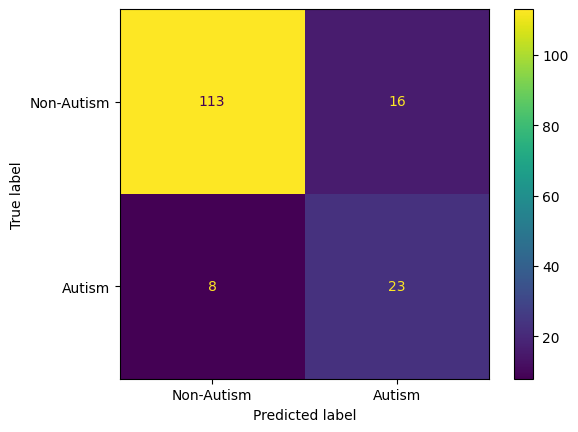

In [41]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Non-Autism', 'Autism'])

cm_display.plot()
plt.show()